In [ ]:
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

In [11]:
parcels_taxvals_merged_url = 'https://media.githubusercontent.com/media/rohanskalyani/sfpermittimes/main/Data/parcels_taxvals_merged.csv?raw=true'
SFDBIData_url = 'https://media.githubusercontent.com/media/rohanskalyani/sfpermittimes/main/Data/SFDBI_Permits.csv?raw=true'

parcels_taxvals_merged = pd.read_csv(parcels_taxvals_merged_url, index_col = 0)
SFDBIPermit = pd.read_csv(SFDBIData_url)

In [13]:
parcels_taxvals_merged.head()

,project_id_drop,from_address_num,date_map_alt,odd_even,zoning_code,zoning_district,pw_recorded_map,mapblklot,date_map_add,to_address_num,...,blklot,in_asr_secured_roll,date_rec_add,lot_num,active,geometry,Parcel Number,Number of Rooms,Property Area,Total Taxable Value
0,NaN,1301.0,NaN,O,C-2,COMMUNITY BUSINESS,True,0024002,1998-07-01,1301.0,...,0024002,True,NaN,002,True,MULTIPOLYGON (((-122.4189408105767 37.80599835...,0024002,10.0,2770.0,843421.0
1,NaN,710.0,NaN,E,RH-3,"RESIDENTIAL- HOUSE, THREE FAMILY",True,0024005,1998-07-01,710.0,...,0024005,True,NaN,005,True,MULTIPOLYGON (((-122.41917559180574 37.8059683...,0024005,13.0,2812.0,1832895.0
2,NaN,712.0,NaN,E,RH-3,"RESIDENTIAL- HOUSE, THREE FAMILY",True,0024006,1998-07-01,714.0,...,0024006,True,NaN,006,True,MULTIPOLYGON (((-122.41925385141641 37.8059584...,0024006,12.0,3402.0,443974.0
3,NaN,736.0,NaN,E,RH-3,"RESIDENTIAL- HOUSE, THREE FAMILY",True,0024007,1998-07-01,740.0,...,0024007,True,NaN,007,True,MULTIPOLYGON (((-122.41933074453019 37.8059485...,0024007,10.0,2437.0,168992.0
4,NaN,760.0,NaN,E,RH-3,"RESIDENTIAL- HOUSE, THREE FAMILY",True,0024009,1998-07-01,760.0,...,0024009,True,NaN,009,True,MULTIPOLYGON (((-122.41964401475822 37.8059086...,0024009,0.0,7498.0,1382702.0


In [38]:
Master_merge = parcels_taxvals_merged.merge(SFDBIPermit, how='inner', left_on='mapblklot', right_on='Parcel Number')

In [39]:
Master_merge.columns
#Master_merge.shape

Index(['project_id_drop', 'from_address_num', 'date_map_alt', 'odd_even',
       'zoning_code', 'zoning_district', 'pw_recorded_map', 'mapblklot',
       'date_map_add', 'to_address_num', 'street_name_x', 'project_id_alt',
       'date_map_drop', 'street_type', 'project_id_add', 'date_rec_drop',
       'block_num', 'blklot', 'in_asr_secured_roll', 'date_rec_add', 'lot_num',
       'active', 'geometry_x', 'Parcel Number_x', 'Number of Rooms',
       'Property Area', 'Total Taxable Value', 'record_id', 'issued_date',
       'zipcode', 'neighborhoods_analysis_boundaries', 'proposed_use',
       'description', 'revised_cost', 'site_permit', 'plansets',
       'permit_creation_date', 'status_date',
       'first_construction_document_date', 'filed_date', 'street_name_y',
       'block', 'estimated_cost', 'permit_expiration_date',
       'permit_type_definition', 'status', 'completed_date', 'permit_number',
       'lot', 'street_suffix', 'proposed_units', 'permit_type',
       'number_of_pro

In [45]:
Master_merge['Number of Rooms'].count()

691

In [103]:
Regression_Table = Master_merge[['wait_time','zoning_code','Number of Rooms','Property Area','Total Taxable Value','revised_cost','site_permit','plansets','estimated_cost', 'proposed_units','number_of_proposed_stories','year']]

In [104]:
Regression_Table.describe()

,wait_time,Number of Rooms,Property Area,Total Taxable Value,revised_cost,plansets,estimated_cost,proposed_units,number_of_proposed_stories,year
count,691.000000,691.000000,691.000000,6.910000e+02,6.910000e+02,691.000000,6.910000e+02,691.000000,691.000000,691.000000
mean,493.785818,7.750458,5604.640328,4.735336e+06,1.655007e+07,2.001447,1.558391e+07,54.739508,4.667149,2016.121563
std,360.804894,34.455969,18776.944208,1.416579e+07,3.749301e+07,0.065922,3.623191e+07,81.810058,4.682599,2.105131
min,35.000000,0.000000,0.000000,0.000000e+00,1.000000e+03,1.000000,1.000000e+00,0.000000,0.000000,2013.000000
25%,303.000000,0.000000,817.000000,4.318200e+05,5.450000e+05,2.000000,4.118961e+05,1.000000,3.000000,2014.000000
50%,340.000000,3.000000,1309.000000,7.974040e+05,1.600000e+06,2.000000,1.500000e+06,3.000000,4.000000,2016.000000
75%,631.000000,6.000000,1908.500000,2.153320e+06,2.600000e+07,2.000000,2.600000e+07,136.000000,5.000000,2017.000000
max,2212.000000,408.000000,169167.200000,1.409837e+08,5.200000e+08,3.000000,5.200000e+08,550.000000,60.000000,2021.000000


In [105]:
Regression_Table.corr()

,wait_time,Number of Rooms,Property Area,Total Taxable Value,revised_cost,site_permit,plansets,estimated_cost,proposed_units,number_of_proposed_stories,year
wait_time,1.000000,-0.005045,0.038849,0.024878,-0.024344,0.273656,-0.024055,-0.031286,-0.139768,0.038477,0.524910
Number of Rooms,-0.005045,1.000000,0.212880,0.119582,-0.010390,-0.096190,-0.006859,-0.010793,-0.062684,-0.039906,0.040912
Property Area,0.038849,0.212880,1.000000,0.601980,0.356455,0.009969,-0.007089,0.336715,0.234036,0.276422,0.042115
Total Taxable Value,0.024878,0.119582,0.601980,1.000000,0.493964,0.080997,-0.007376,0.449072,0.428895,0.478864,-0.030319
revised_cost,-0.024344,-0.010390,0.356455,0.493964,1.000000,0.159387,0.053653,0.994312,0.730699,0.872646,0.006256
site_permit,0.273656,-0.096190,0.009969,0.080997,0.159387,1.000000,0.074030,0.157342,0.242608,0.181311,0.053025
plansets,-0.024055,-0.006859,-0.007089,-0.007376,0.053653,0.074030,1.000000,0.056158,0.046560,0.025038,0.009174
estimated_cost,-0.031286,-0.010793,0.336715,0.449072,0.994312,0.157342,0.056158,1.000000,0.707345,0.849764,0.001043
proposed_units,-0.139768,-0.062684,0.234036,0.428895,0.730699,0.242608,0.046560,0.707345,1.000000,0.628152,-0.225874
number_of_proposed_stories,0.038477,-0.039906,0.276422,0.478864,0.872646,0.181311,0.025038,0.849764,0.628152,1.000000,0.050570


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


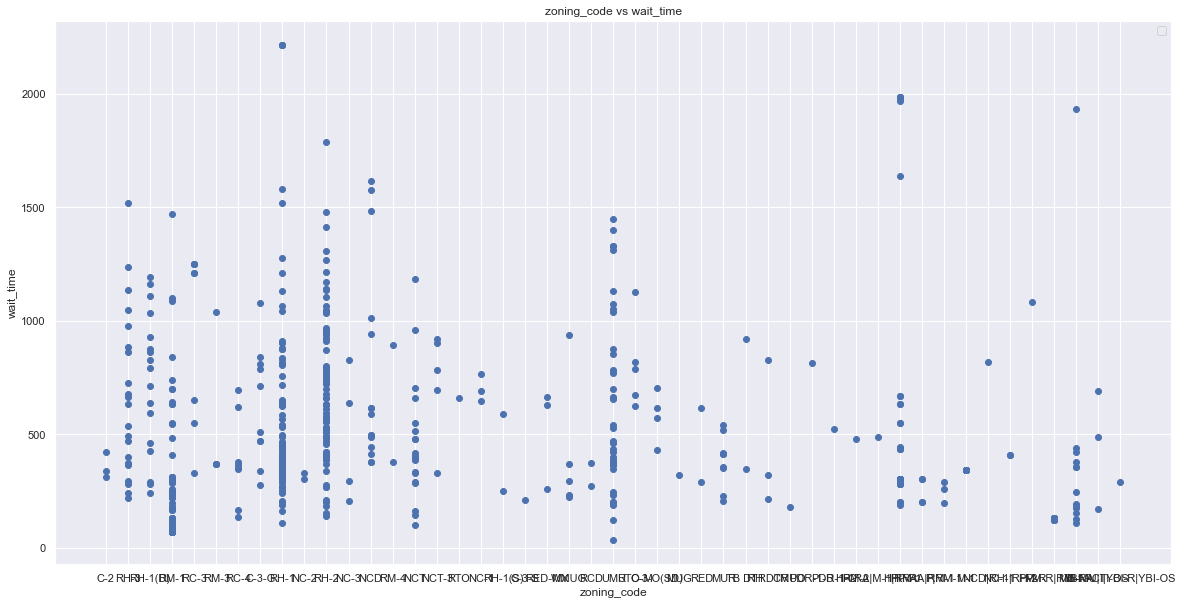

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


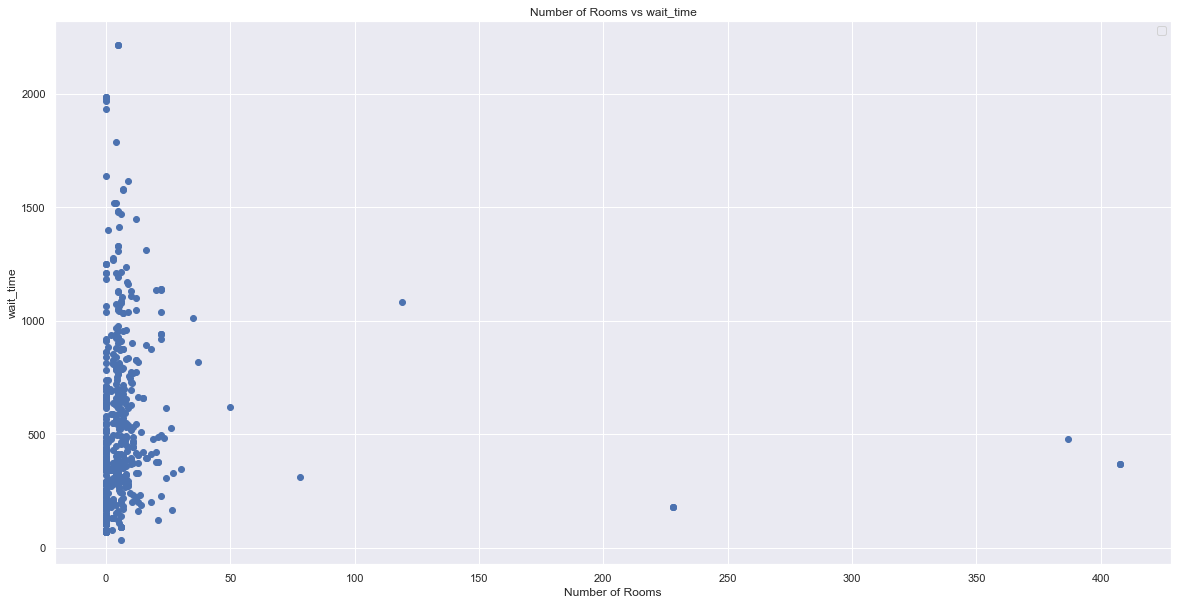

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


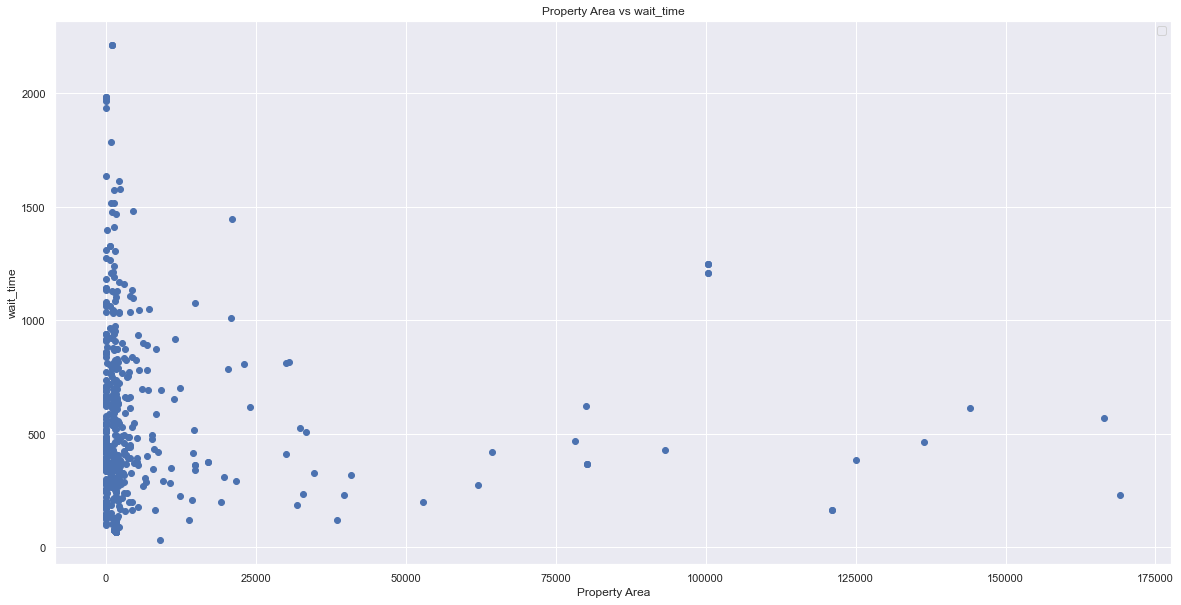

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


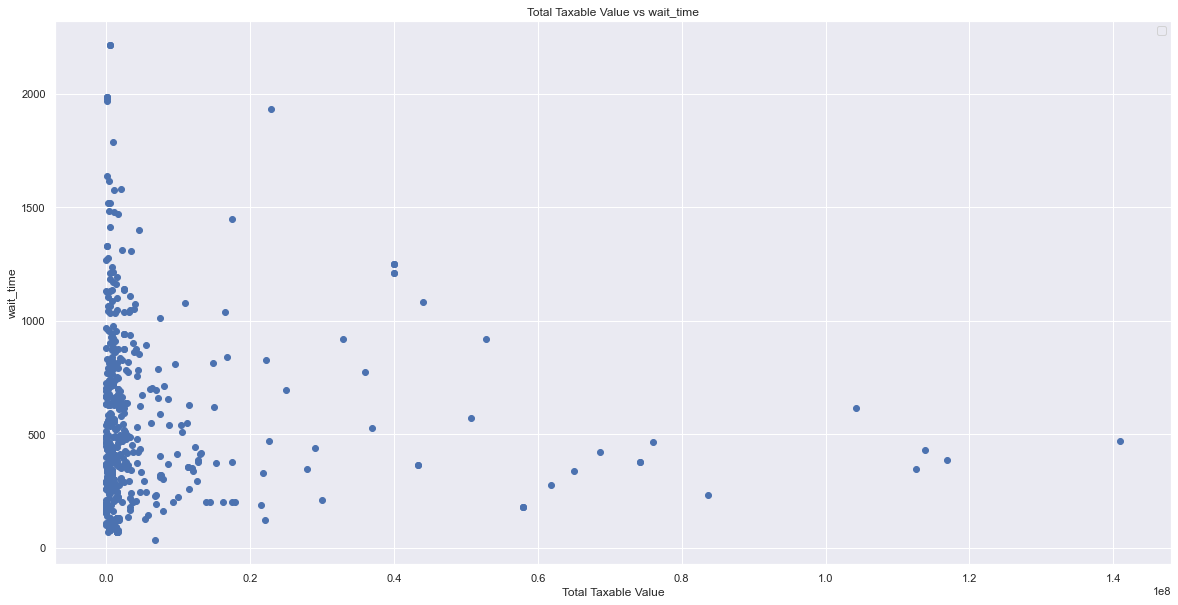

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


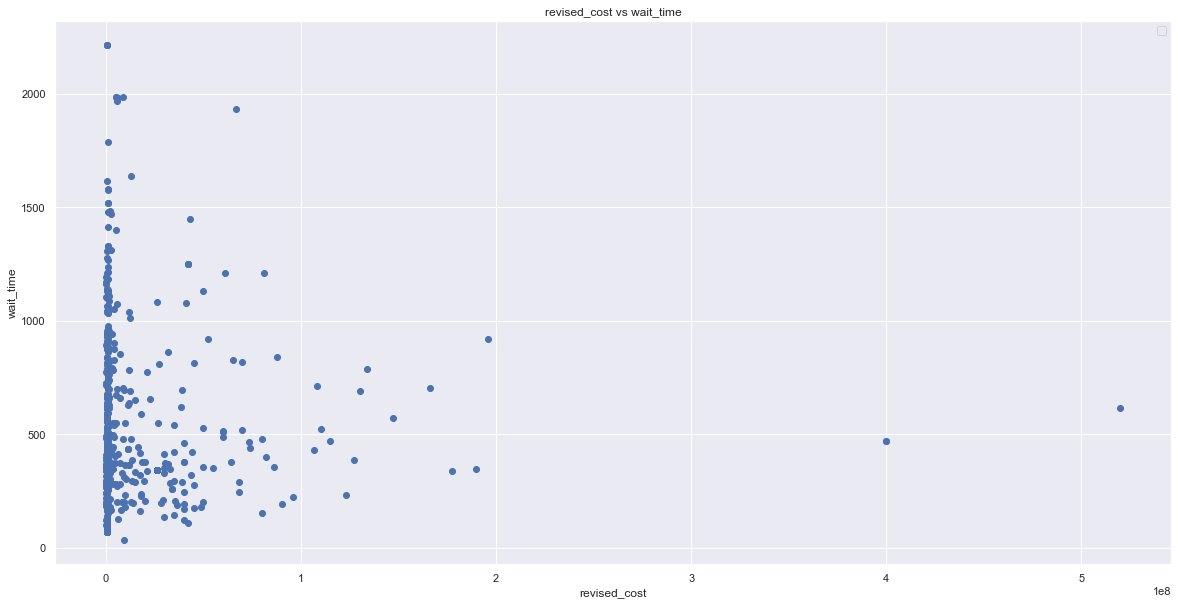

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


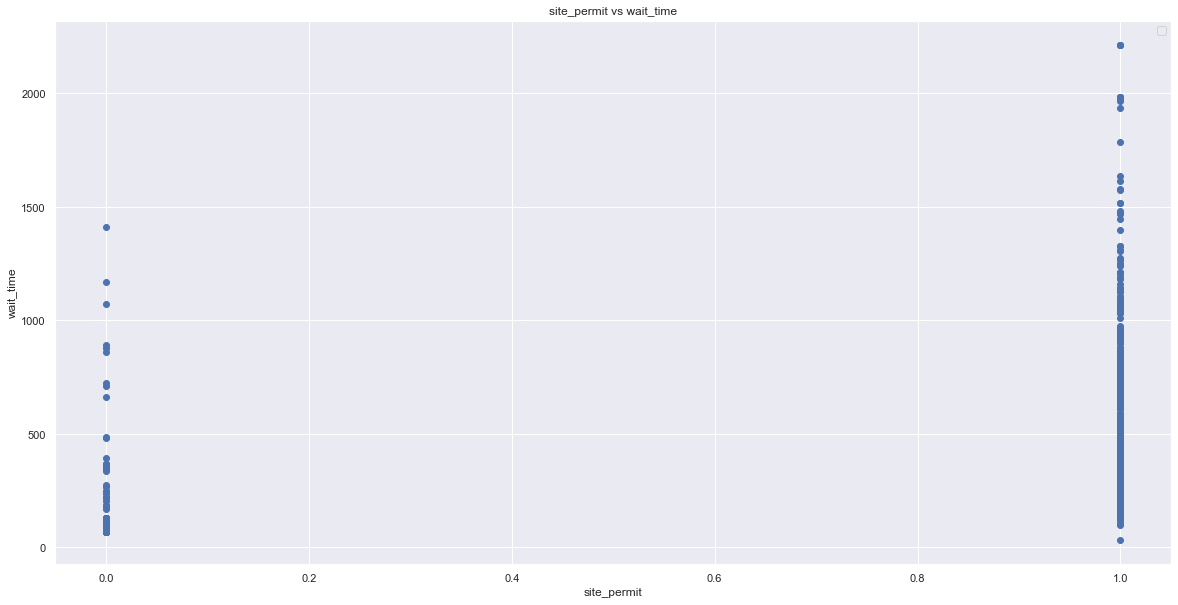

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


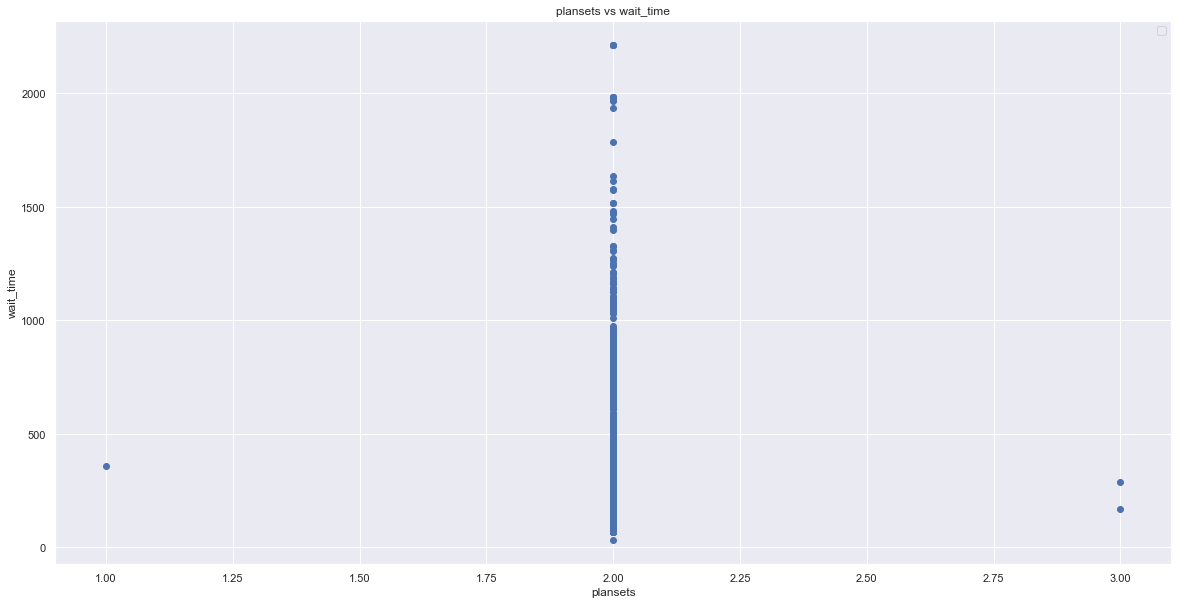

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


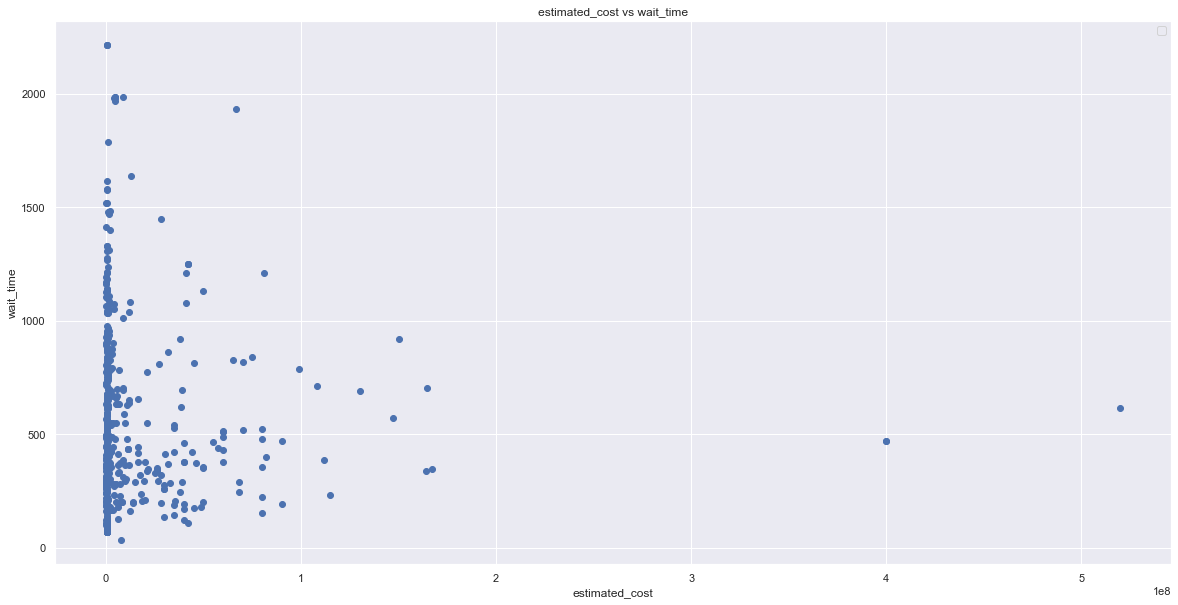

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


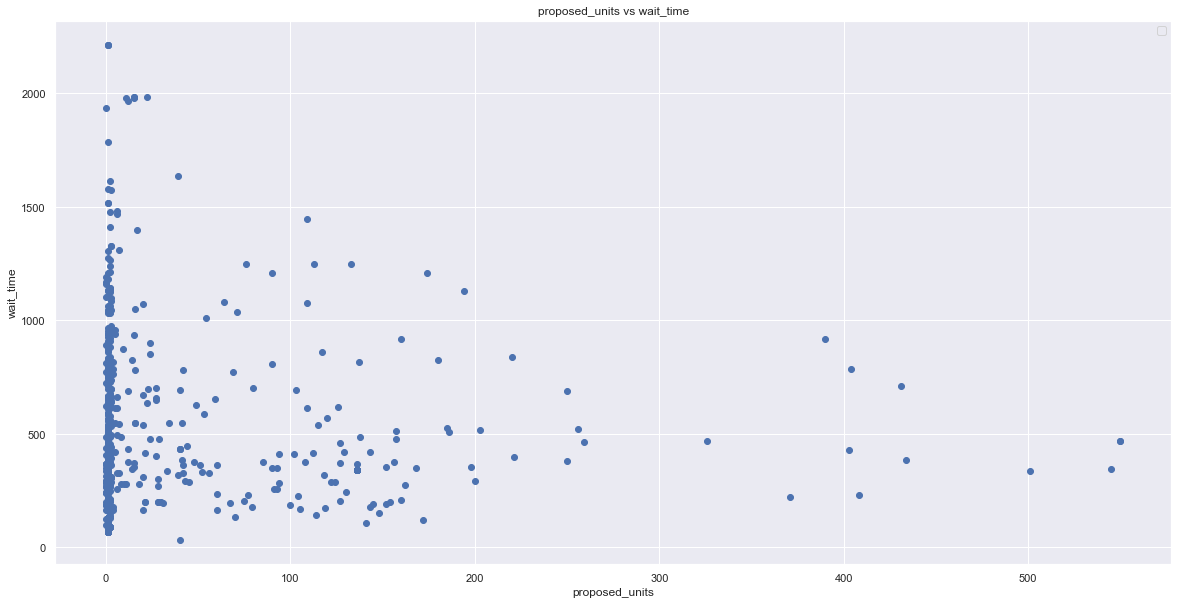

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


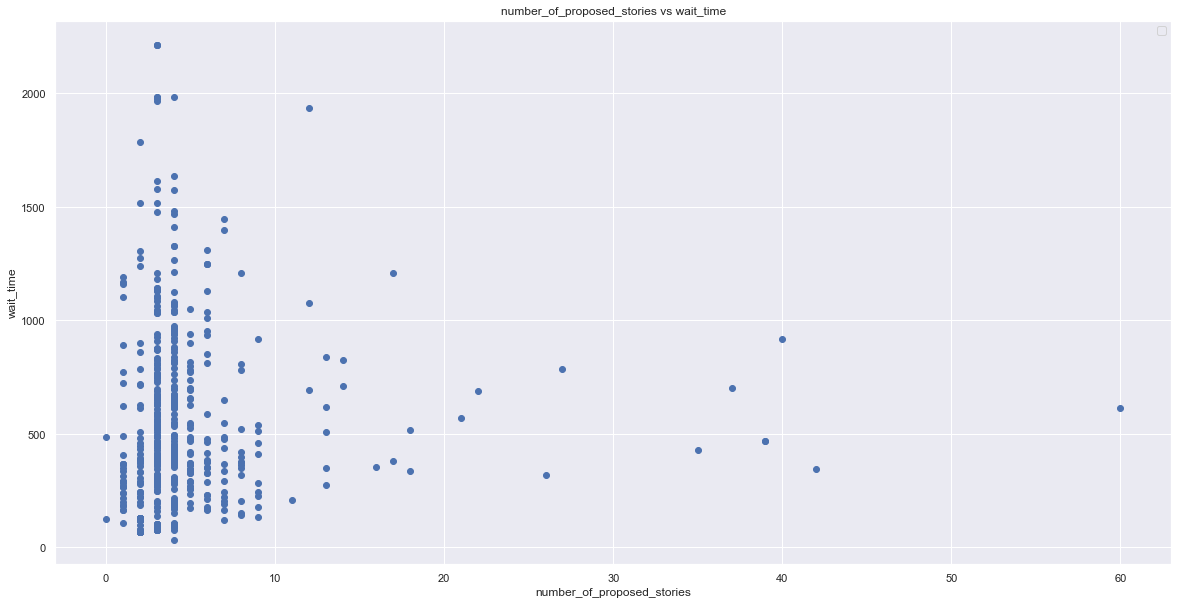

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


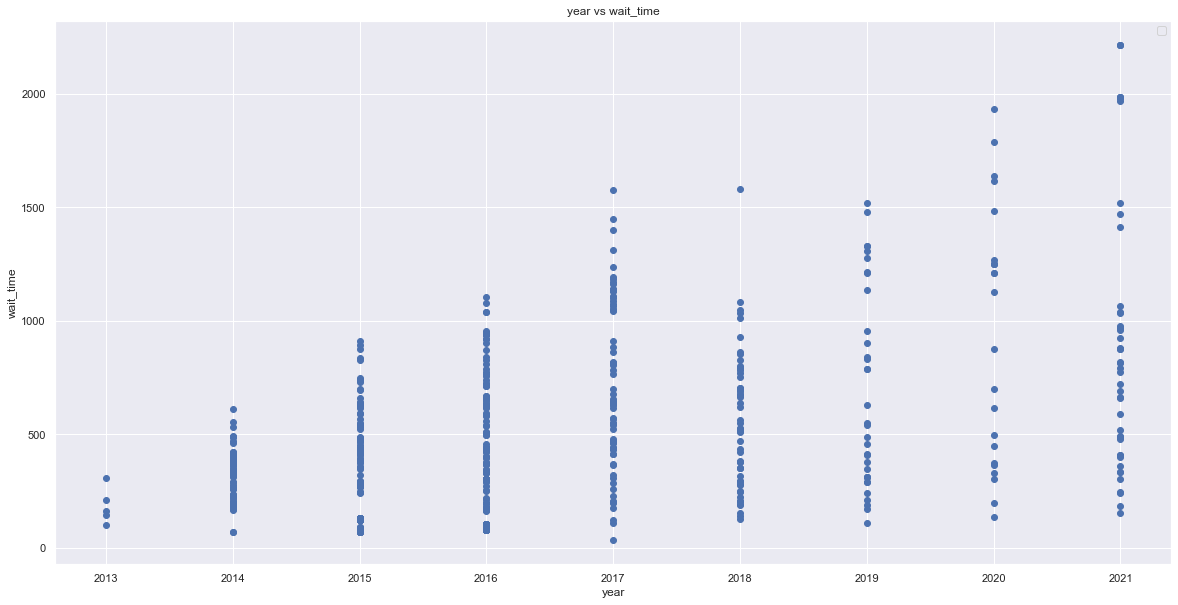

In [106]:
regressors = ['zoning_code','Number of Rooms','Property Area','Total Taxable Value','revised_cost','site_permit','plansets','estimated_cost', 'proposed_units','number_of_proposed_stories','year']

for reg in regressors:

    figure = plt.figure
    ax = plt.gca()
    ax.scatter(Regression_Table[reg],Regression_Table['wait_time'])
    ax.set_xlabel(reg)
    ax.set_ylabel('wait_time')
    ax.set_title("{} vs {}".format(reg,'wait_time'))

    plt.legend()
    plt.show()

<AxesSubplot:xlabel='zoning_code', ylabel='wait_time'>

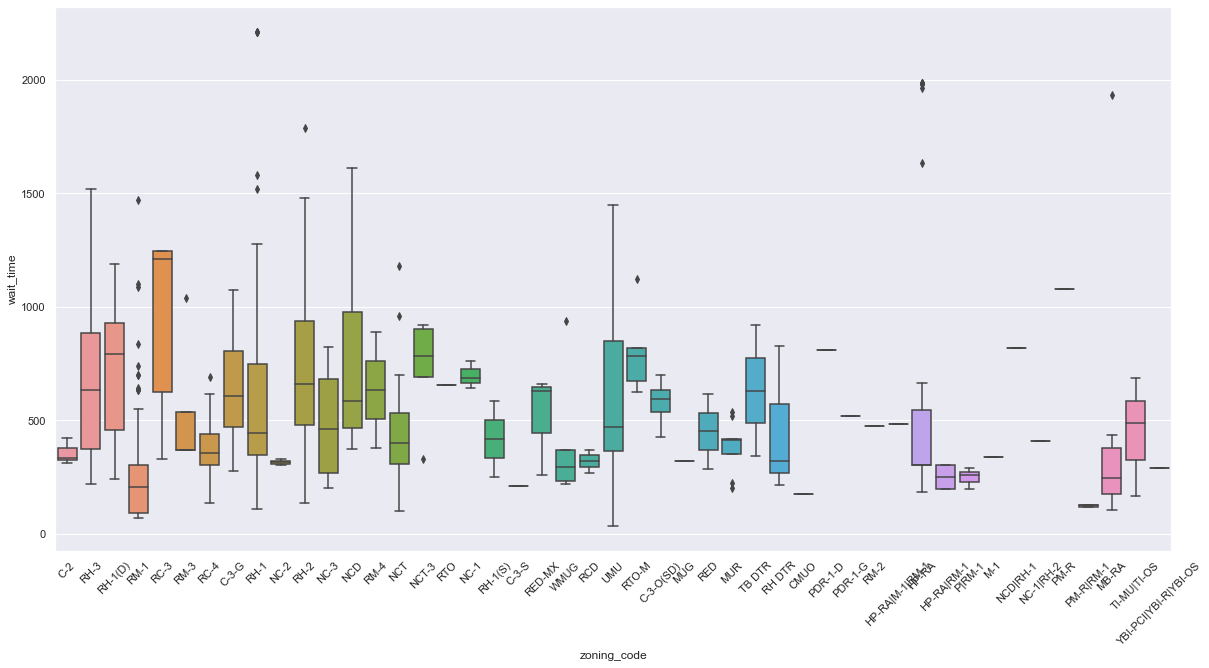

In [107]:
sns.set(rc = {'figure.figsize':(20,10)})
plt.xticks(rotation=45)
sns.boxplot(y='wait_time',x='zoning_code',data=Regression_Table)

<AxesSubplot:xlabel='zoning_district', ylabel='wait_time'>

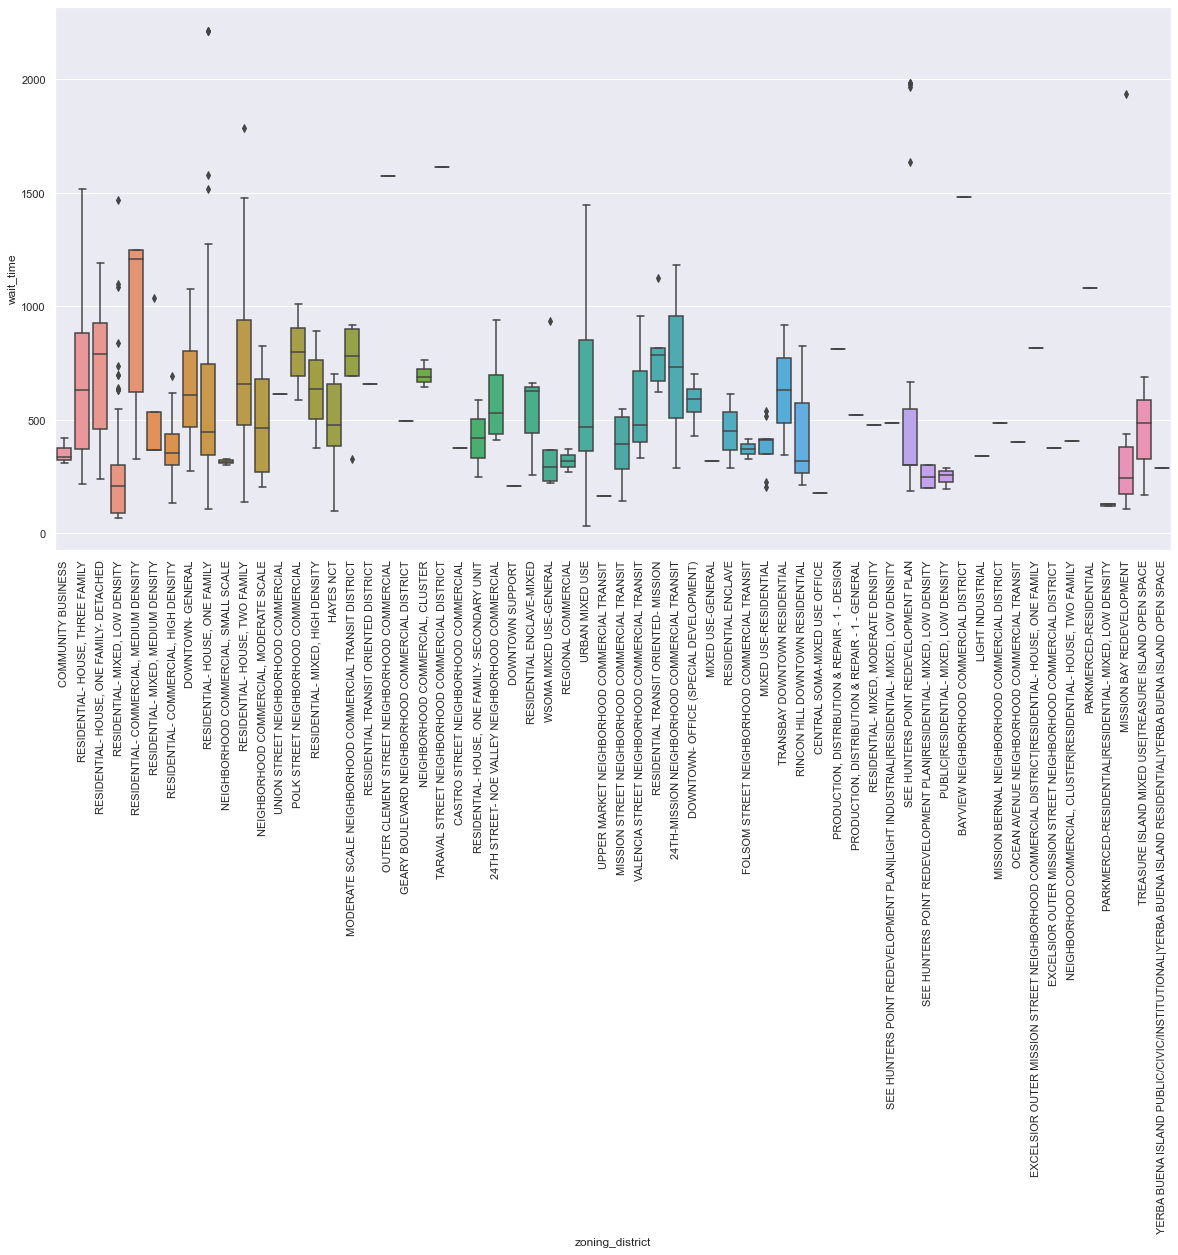

In [84]:
sns.set(rc = {'figure.figsize':(20,10)})
plt.xticks(rotation=90)
sns.boxplot(y='wait_time',x='zoning_district',data=Regression_Table)

In [122]:
Regression_Table_wDummies = pd.get_dummies(data=Regression_Table, drop_first=True)
Regression_Table_wDummies.isna().sum()

wait_time                           0
Number of Rooms                     0
Property Area                       0
Total Taxable Value                 0
revised_cost                        0
site_permit                         0
plansets                            0
estimated_cost                      0
proposed_units                      0
number_of_proposed_stories          0
year                                0
zoning_code_C-3-G                   0
zoning_code_C-3-O(SD)               0
zoning_code_C-3-S                   0
zoning_code_CMUO                    0
zoning_code_HP-RA                   0
zoning_code_HP-RA|M-1|RM-1          0
zoning_code_HP-RA|RM-1              0
zoning_code_M-1                     0
zoning_code_MB-RA                   0
zoning_code_MUG                     0
zoning_code_MUR                     0
zoning_code_NC-1                    0
zoning_code_NC-1|RH-2               0
zoning_code_NC-2                    0
zoning_code_NC-3                    0
zoning_code_

In [109]:
Regression_Table_wDummies.corr().sort_values(by='wait_time', ascending =False)

,wait_time,Number of Rooms,Property Area,Total Taxable Value,revised_cost,site_permit,plansets,estimated_cost,proposed_units,number_of_proposed_stories,...,zoning_code_RM-2,zoning_code_RM-3,zoning_code_RM-4,zoning_code_RTO,zoning_code_RTO-M,zoning_code_TB DTR,zoning_code_TI-MU|TI-OS,zoning_code_UMU,zoning_code_WMUG,zoning_code_YBI-PCI|YBI-R|YBI-OS
wait_time,1.000000,-0.005045,0.038849,0.024878,-0.024344,0.273656,-0.024055,-0.031286,-0.139768,0.038477,...,-0.001878,0.008881,0.021027,0.017339,0.073693,0.020579,-0.008447,0.090094,-0.019603,-0.021517
year,0.524910,0.040912,0.042115,-0.030319,0.006256,0.053025,0.009174,0.001043,-0.225874,0.050570,...,0.088286,0.040932,0.009692,-0.002200,0.068118,-0.003113,0.132211,0.040814,0.019417,0.052092
site_permit,0.273656,-0.096190,0.009969,0.080997,0.159387,1.000000,0.074030,0.157342,0.242608,0.181311,...,0.014638,-0.141504,-0.059703,0.014638,0.032826,0.020716,0.025390,0.078281,0.032826,0.014638
zoning_code_RH-2,0.210171,-0.007029,-0.080626,-0.086371,-0.147932,0.052316,-0.007723,-0.145844,-0.229217,-0.112397,...,-0.013383,-0.026824,-0.018940,-0.013383,-0.030012,-0.018940,-0.023213,-0.088289,-0.030012,-0.013383
zoning_code_RC-3,0.140322,-0.018075,0.333067,0.168295,0.064670,0.041613,-0.002378,0.059085,0.036751,0.071304,...,-0.004120,-0.008258,-0.005831,-0.004120,-0.009240,-0.005831,-0.007147,-0.027181,-0.009240,-0.004120
zoning_code_NCD,0.113596,0.010556,-0.012322,-0.027374,-0.051690,0.057276,-0.003272,-0.055473,-0.079699,-0.021238,...,-0.005671,-0.011366,-0.008026,-0.005671,-0.012717,-0.008026,-0.009836,-0.037412,-0.012717,-0.005671
zoning_code_RH-1,0.110668,-0.025394,-0.080154,-0.087933,-0.154159,0.060936,-0.075992,-0.151826,-0.241596,-0.158471,...,-0.013969,-0.027999,-0.019770,-0.013969,-0.031327,-0.019770,-0.024231,-0.092158,-0.031327,-0.013969
zoning_code_RH-1(D),0.103946,-0.005736,-0.027492,-0.035538,-0.065502,-0.022602,-0.003489,-0.064616,-0.104742,-0.070560,...,-0.006046,-0.012118,-0.008557,-0.006046,-0.013559,-0.008557,-0.010487,-0.039887,-0.013559,-0.006046
zoning_code_UMU,0.090094,-0.000279,0.156067,0.301703,0.072311,0.078281,-0.005517,0.061463,0.118067,0.038811,...,-0.009561,-0.019164,-0.013531,-0.009561,-0.021442,-0.013531,-0.016584,1.000000,-0.021442,-0.009561
zoning_code_RH-3,0.085452,-0.005748,-0.035446,-0.044820,-0.067636,0.017737,-0.003889,-0.065979,-0.103179,-0.063077,...,-0.006740,-0.013509,-0.009538,-0.006740,-0.015115,-0.009538,-0.011691,-0.044464,-0.015115,-0.006740


In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.svm import SVR

estimator = SVR(kernel="linear")
selector = RFECV(estimator, step=1, cv=5)
selector = selector.fit(Regression_Table_wDummies.iloc[:,1:], Regression_Table_wDummies['wait_time'])
selector.support_
selector.ranking_